# ANALYSIS

In [1]:
!pip install vaderSentiment #installing vaderSentimnent
!pip install textblob
!pip install wordcloud
!pip install stylecloud

In [ ]:
#libraries
import re 
import textblob
import numpy as np
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud


import nltk 
from collections import Counter
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



In [100]:
df =pd.read_csv('data_final.csv', parse_dates=["Date"], engine='python') #read data

In [83]:
df

,Unnamed: 0,Unnamed: 0.1,Date,ID,url,username,location,hashtags,tweet,num_of_likes,num_of_retweet,cleanedTweets
0,0,0,2022-12-30 23:51:05+00:00,1.608974e+18,https://twitter.com/b001_steve/status/16089739...,b001_steve,somewhere in virginia,"['Russians', 'RussianMobilization', 'DeadMeat'...","Tick-Tock #Russians,\nSoon you will be sent,\n...",3.0,3.0,tick tock soon sent slaughterhouse processing ...
1,1,1,2022-12-30 23:50:14+00:00,1.608974e+18,https://twitter.com/yorukhunnn/status/16089737...,yorukhunnn,kyivukraine,"['Ukraine', 'UkraineWar', 'Russia']",Defense Minister Oleksii Reznikov warned Russi...,2.0,4.0,defense minister oleksii reznikov warned russi...
2,2,2,2022-12-30 23:44:21+00:00,1.608972e+18,https://twitter.com/OneVenusThrow/status/16089...,OneVenusThrow,mannahata,"['Moscow', 'NewYear', 'Russian', 'Ukraine', 'C...","In #Moscow, the #NewYear is the country's main...",0.0,0.0,countrys main holiday year giant letters z sym...
3,3,3,2022-12-30 23:39:38+00:00,1.608971e+18,https://twitter.com/Mickey17176/status/1608971...,Mickey17176,united states,"['Putin', 'Russia', 'UkraineFrontLines', 'Ukra...",#Putin Can’t Fix This Disaster: Is #Russia Run...,0.0,0.0,fix disaster running troops ukraine
4,4,4,2022-12-30 23:14:19+00:00,1.608965e+18,https://twitter.com/Brave_spirit81/status/1608...,Brave_spirit81,ukraine,"['Бахмут', 'бахмут', 'Bakhmut', 'russiaukraine...","""This is such a struggle that I have never see...",8.0,2.0,struggle never seen american journalist ben k ...
...,...,...,...,...,...,...,...,...,...,...,...,...
27676,27676,27676,2022-02-25 05:37:35+00:00,1.497083e+18,https://twitter.com/LonelyNepali/status/149708...,LonelyNepali,nepal,"['UkraineInvasion', 'Ukraine', 'UkraineRussia'...",National sovereignty should be respected. Russ...,0.0,2.0,national sovereignty respected russia stop int...
27677,27677,27677,2022-02-25 05:36:37+00:00,1.497083e+18,https://twitter.com/jwoods_apex/status/1497083...,jwoods_apex,ottawa ontario,"['war', 'Ukraine', 'UkraineInvasion', 'Ukraine...",FUCKTHEGOVERNMENT (prod. gODth) MUSIC VIDEO\nP...,7.0,1.0,fuckthegovernment prod godth music video pleas...
27678,27678,27678,2022-02-25 05:31:42+00:00,1.497082e+18,https://twitter.com/KnightWing19/status/149708...,KnightWing19,the great white north canada,"['Trudeau', 'Putin', 'Ukraine', 'FreedomConvoy...",Interesting how the rhetoric #Trudeau used aga...,3.0,0.0,interesting rhetoric used truckers amp real pe...
27679,27679,27679,2022-02-25 05:30:02+00:00,1.497081e+18,https://twitter.com/rohit_759/status/149708143...,rohit_759,himachal pradesh india,"['Ukraine', 'UkraineWar', 'UkraineRussia', 'Uk...",Anti-war protesters and Ukrainians protesting ...,1.0,0.0,anti war protesters ukrainians protesting russ...


In [ ]:
''' WORD COUNTS'''

words = []

for tweet in df["cleanedTweets"]:
    tweet= str(tweet)
    for word in tweet.split():
        words.append(word)
word_counts = pd.DataFrame(Counter(words).most_common(100)).rename({0: "word", 1: "count"}, axis=1)
plt.figure(figsize=(10, 5))

plt.bar(word_counts["word"][:20], word_counts["count"][:20])
plt.xticks(rotation=90)
plt.title("Word Counts", fontsize=12)
plt.show()

In [ ]:
!pip install dataframe_image
!apt install chromium-chromedriver

In [43]:
import nltk
from nltk.util import ngrams
from collections import Counter

# Create a column with the text you want to analyze
df=df[df['cleanedTweets'].apply(lambda x: isinstance(x, str))] 
text_column = df['cleanedTweets']

# Create a list of sentences from the text column
sentences = text_column.tolist()

# Flatten the list of sentences into one long list of words
words = [word for sentence in sentences for word in sentence.split()]

# Generate the n-grams
n = 3

ngrams = ngrams(words, n)

# Count the frequency of each n-gram
ngram_freq = Counter(ngrams)

# Find the n most common n-grams
n = 10
most_common_ngrams = ngram_freq.most_common(n)

Trigrams = pd.DataFrame(most_common_ngrams, columns=['Trigrams', 'Counts'])
Trigrams
dfi.export(
    Trigrams,
    "table.png",
    table_conversion="matplotlib"
)

In [101]:
'''LEMMATIZATION'''

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    text= str(text)
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
df['Lemmas'] = df['cleanedTweets'].apply(lemmatize_words)

In [102]:
df

,Unnamed: 0,Unnamed: 0.1,Date,ID,url,username,location,hashtags,tweet,num_of_likes,num_of_retweet,cleanedTweets,Lemmas
0,0,0,2022-12-30 23:51:05+00:00,1.608974e+18,https://twitter.com/b001_steve/status/16089739...,b001_steve,somewhere in virginia,"['Russians', 'RussianMobilization', 'DeadMeat'...","Tick-Tock #Russians,\nSoon you will be sent,\n...",3.0,3.0,tick tock soon sent slaughterhouse processing ...,tick tock soon send slaughterhouse process pac...
1,1,1,2022-12-30 23:50:14+00:00,1.608974e+18,https://twitter.com/yorukhunnn/status/16089737...,yorukhunnn,kyivukraine,"['Ukraine', 'UkraineWar', 'Russia']",Defense Minister Oleksii Reznikov warned Russi...,2.0,4.0,defense minister oleksii reznikov warned russi...,defense minister oleksii reznikov warn russian...
2,2,2,2022-12-30 23:44:21+00:00,1.608972e+18,https://twitter.com/OneVenusThrow/status/16089...,OneVenusThrow,mannahata,"['Moscow', 'NewYear', 'Russian', 'Ukraine', 'C...","In #Moscow, the #NewYear is the country's main...",0.0,0.0,countrys main holiday year giant letters z sym...,countrys main holiday year giant letter z symb...
3,3,3,2022-12-30 23:39:38+00:00,1.608971e+18,https://twitter.com/Mickey17176/status/1608971...,Mickey17176,united states,"['Putin', 'Russia', 'UkraineFrontLines', 'Ukra...",#Putin Can’t Fix This Disaster: Is #Russia Run...,0.0,0.0,fix disaster running troops ukraine,fix disaster run troop ukraine
4,4,4,2022-12-30 23:14:19+00:00,1.608965e+18,https://twitter.com/Brave_spirit81/status/1608...,Brave_spirit81,ukraine,"['Бахмут', 'бахмут', 'Bakhmut', 'russiaukraine...","""This is such a struggle that I have never see...",8.0,2.0,struggle never seen american journalist ben k ...,struggle never see american journalist ben k s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27676,27676,27676,2022-02-25 05:37:35+00:00,1.497083e+18,https://twitter.com/LonelyNepali/status/149708...,LonelyNepali,nepal,"['UkraineInvasion', 'Ukraine', 'UkraineRussia'...",National sovereignty should be respected. Russ...,0.0,2.0,national sovereignty respected russia stop int...,national sovereignty respect russia stop inter...
27677,27677,27677,2022-02-25 05:36:37+00:00,1.497083e+18,https://twitter.com/jwoods_apex/status/1497083...,jwoods_apex,ottawa ontario,"['war', 'Ukraine', 'UkraineInvasion', 'Ukraine...",FUCKTHEGOVERNMENT (prod. gODth) MUSIC VIDEO\nP...,7.0,1.0,fuckthegovernment prod godth music video pleas...,fuckthegovernment prod godth music video pleas...
27678,27678,27678,2022-02-25 05:31:42+00:00,1.497082e+18,https://twitter.com/KnightWing19/status/149708...,KnightWing19,the great white north canada,"['Trudeau', 'Putin', 'Ukraine', 'FreedomConvoy...",Interesting how the rhetoric #Trudeau used aga...,3.0,0.0,interesting rhetoric used truckers amp real pe...,interest rhetoric use truckers amp real peacef...
27679,27679,27679,2022-02-25 05:30:02+00:00,1.497081e+18,https://twitter.com/rohit_759/status/149708143...,rohit_759,himachal pradesh india,"['Ukraine', 'UkraineWar', 'UkraineRussia', 'Uk...",Anti-war protesters and Ukrainians protesting ...,1.0,0.0,anti war protesters ukrainians protesting russ...,anti war protesters ukrainians protest russias...


In [99]:
df['location'].value_counts().head() #find the top 5 locations where the tweets are shared from

india             594
united states     516
ukraine           505
london england    339
united kingdom    333
Name: location, dtype: int64

In [47]:
'''SENTIMENT CATEGORIZATION WITH VADER'''
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

df['VaderSentiment'] = df['Lemmas'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    THRESHOLD = 0.2
    if compound >THRESHOLD:
        return 'Positive'
    elif compound < THRESHOLD:
        return 'Negative'
    else:
        return 'Neutral'
df['VaderAnalysis'] = df['VaderSentiment'].apply(vader_analysis)


In [48]:
vader_sentCounts =df['VaderAnalysis'].value_counts()
vader_sentCounts

Negative    18417
Positive     9177
Name: VaderAnalysis, dtype: int64

In [103]:
'''SENTIMENT CATEGORIZATION WITH TEXTBLOB'''
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(text):
    text=str(text)
    return TextBlob(text).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(text):
    text=str(text)
    return TextBlob(text).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    THRESHOLD= 0.2
    if score < THRESHOLD:
        return 'Negative'
    elif score > THRESHOLD:
        return 'Positive'
    else:
        return 'Neutral'

In [104]:
df['TB_Polarity'] = df['cleanedTweets'].apply(getPolarity) 
df['TextBlobAnalysis'] = df['TB_Polarity'].apply(analysis)


In [76]:
tb_sentCounts = df.TextBlobAnalysis.value_counts()

tb_sentCounts

Negative    21424
Positive     5543
Neutral       627
Name: TextBlobAnalysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f13725b1640>,
 [Text(-0.5522760785138555, 0.9513102191721468, 'Negative'),
  Text(0.6777934783960219, -1.1675170237062162, 'Positive')],
 [Text(-0.3012414973711939, 0.5188964831848073, '66.7%'),
  Text(0.4267588567678655, -0.7351033112224323, '33.3%')])

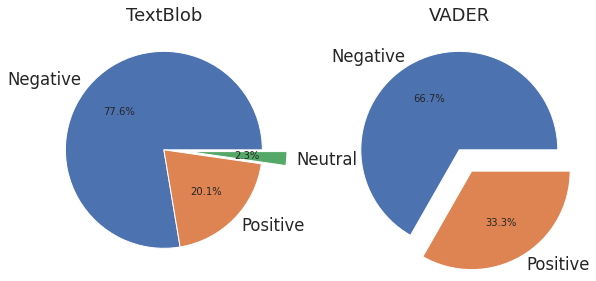

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob")
plt.pie(tb_sentCounts.values, labels = tb_sentCounts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER")
plt.pie(vader_sentCounts.values, labels = vader_sentCounts.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)


In [104]:
plt.savefig('Plot.jpg', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

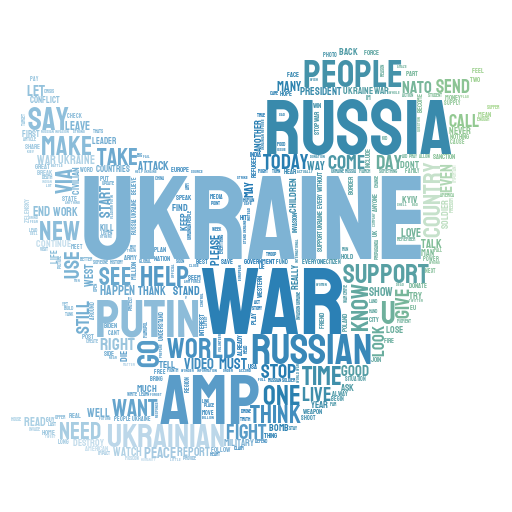

In [78]:
''' generateing Twitter-logo-shaped WordCloud with the column lemmas'''

text = " ".join(review for review in df.Lemmas.astype(str))
#open text file
text_file = open("data.txt", "w")

#write string to file
n = text_file.write(text)

import stylecloud 
stylecloud.gen_stylecloud(file_path='/content/data.txt',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3', #https://jiffyclub.github.io/palettable/
                          background_color='white',
                          gradient='horizontal',
                          stopwords = True,
)

from IPython.display import Image
Image('stylecloud.png')
     



In [ ]:
df

In [ ]:
df.index = pd.to_datetime(df['Date'],format='%y-%m-%d')
df.groupby(by=[df.index.month, df.index.year])    #grouping dataframe by indexing date with datetime info

Text(0.5, 1.0, 'Overall Sentiments by Months')

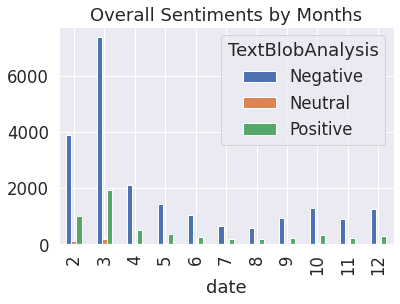

In [88]:
df['date'] = pd.to_datetime(df['Date'])
df['date'] = df['date'].dt.month


grouped = df.groupby(by='date')['TextBlobAnalysis'].value_counts()

unstacked = grouped.unstack(level=1)

ax= unstacked.plot.bar()
ax.set_title("Overall Sentiments by Months")

In [ ]:
df['word_count'] = df['cleanedTweets'].apply(lambda x: len(str(x).split())) #tweet word counts
df['tweets_len'] = df['cleanedTweets'].astype(str).apply(len)
df[["tweets_len", "word_count"]].hist(bins=20, figsize=(20, 10))


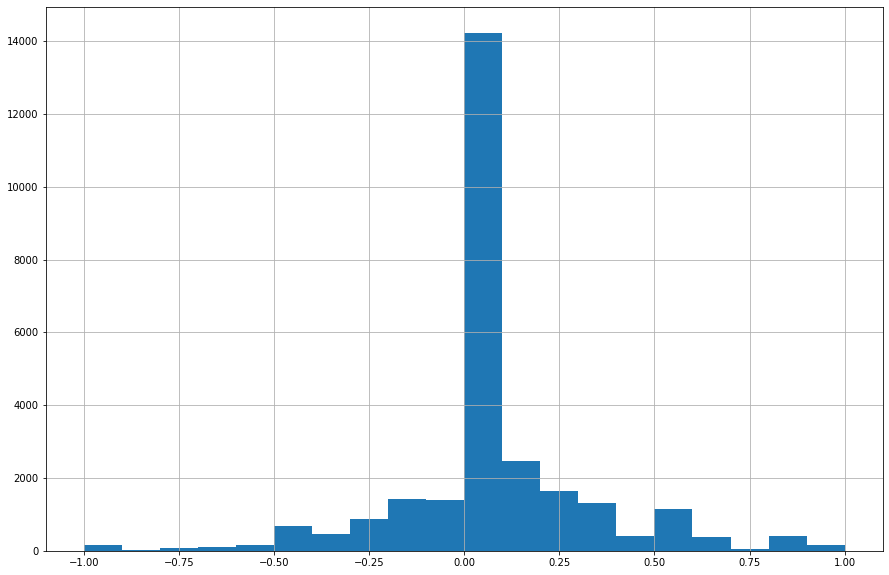

In [65]:
df["TB_Polarity"].hist(bins=20, figsize=(15, 10))

In [72]:
import seaborn as sns

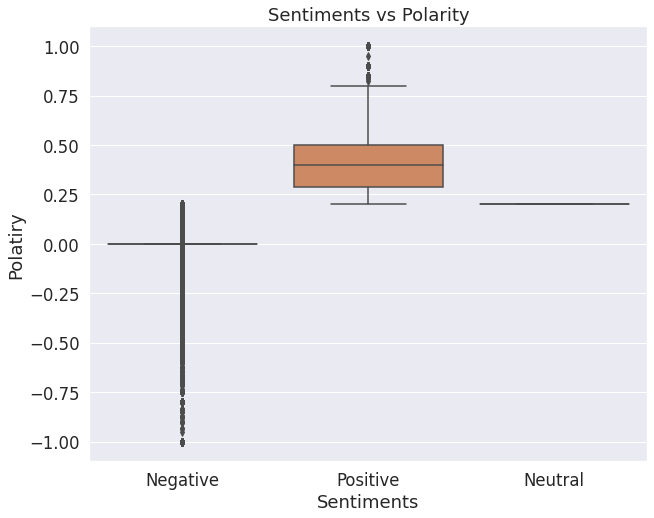

In [89]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'TextBlobAnalysis', y = 'TB_Polarity', data = df)
plt.xlabel("Sentiments")
plt.ylabel("Polatiry")
plt.title("Sentiments vs Polarity")
plt.show()

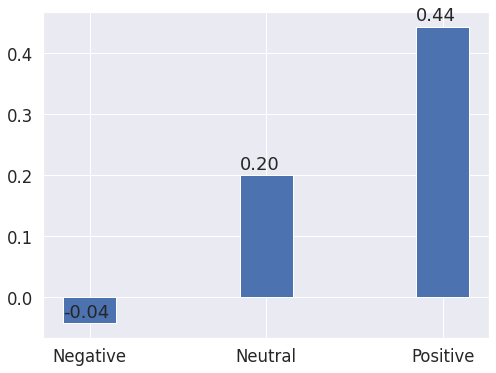

In [96]:
mean_pol = df.groupby('TextBlobAnalysis')['TB_Polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))

## Location Based Analysis of TextBlob Categorization

In [95]:
df['date'] = pd.to_datetime(df['Date'])
df['date'] = df['date'].dt.month


grouped = df.groupby(by='date')['location'].value_counts()

unstacked = grouped.unstack(level=1)
unstacked.plot.bar()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f13fd4cf280> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f13fd1f2e50> (for post_execute):


KeyboardInterrupt: ignored

In [114]:
df

,Unnamed: 0,Unnamed: 0.1,Date,ID,url,username,location,hashtags,tweet,num_of_likes,num_of_retweet,cleanedTweets,Lemmas,TB_Polarity,TextBlobAnalysis
0,0,0,2022-12-30 23:51:05+00:00,1.608974e+18,https://twitter.com/b001_steve/status/16089739...,b001_steve,somewhere in virginia,"['Russians', 'RussianMobilization', 'DeadMeat'...","Tick-Tock #Russians,\nSoon you will be sent,\n...",3.0,3.0,tick tock soon sent slaughterhouse processing ...,tick tock soon send slaughterhouse process pac...,0.000000,Negative
1,1,1,2022-12-30 23:50:14+00:00,1.608974e+18,https://twitter.com/yorukhunnn/status/16089737...,yorukhunnn,kyivukraine,"['Ukraine', 'UkraineWar', 'Russia']",Defense Minister Oleksii Reznikov warned Russi...,2.0,4.0,defense minister oleksii reznikov warned russi...,defense minister oleksii reznikov warn russian...,0.068182,Negative
2,2,2,2022-12-30 23:44:21+00:00,1.608972e+18,https://twitter.com/OneVenusThrow/status/16089...,OneVenusThrow,mannahata,"['Moscow', 'NewYear', 'Russian', 'Ukraine', 'C...","In #Moscow, the #NewYear is the country's main...",0.0,0.0,countrys main holiday year giant letters z sym...,countrys main holiday year giant letter z symb...,0.083333,Negative
3,3,3,2022-12-30 23:39:38+00:00,1.608971e+18,https://twitter.com/Mickey17176/status/1608971...,Mickey17176,united states,"['Putin', 'Russia', 'UkraineFrontLines', 'Ukra...",#Putin Can’t Fix This Disaster: Is #Russia Run...,0.0,0.0,fix disaster running troops ukraine,fix disaster run troop ukraine,0.000000,Negative
4,4,4,2022-12-30 23:14:19+00:00,1.608965e+18,https://twitter.com/Brave_spirit81/status/1608...,Brave_spirit81,ukraine,"['Бахмут', 'бахмут', 'Bakhmut', 'russiaukraine...","""This is such a struggle that I have never see...",8.0,2.0,struggle never seen american journalist ben k ...,struggle never see american journalist ben k s...,0.000000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27676,27676,27676,2022-02-25 05:37:35+00:00,1.497083e+18,https://twitter.com/LonelyNepali/status/149708...,LonelyNepali,nepal,"['UkraineInvasion', 'Ukraine', 'UkraineRussia'...",National sovereignty should be respected. Russ...,0.0,2.0,national sovereignty respected russia stop int...,national sovereignty respect russia stop inter...,0.000000,Negative
27677,27677,27677,2022-02-25 05:36:37+00:00,1.497083e+18,https://twitter.com/jwoods_apex/status/1497083...,jwoods_apex,ottawa ontario,"['war', 'Ukraine', 'UkraineInvasion', 'Ukraine...",FUCKTHEGOVERNMENT (prod. gODth) MUSIC VIDEO\nP...,7.0,1.0,fuckthegovernment prod godth music video pleas...,fuckthegovernment prod godth music video pleas...,0.200000,Neutral
27678,27678,27678,2022-02-25 05:31:42+00:00,1.497082e+18,https://twitter.com/KnightWing19/status/149708...,KnightWing19,the great white north canada,"['Trudeau', 'Putin', 'Ukraine', 'FreedomConvoy...",Interesting how the rhetoric #Trudeau used aga...,3.0,0.0,interesting rhetoric used truckers amp real pe...,interest rhetoric use truckers amp real peacef...,0.291667,Positive
27679,27679,27679,2022-02-25 05:30:02+00:00,1.497081e+18,https://twitter.com/rohit_759/status/149708143...,rohit_759,himachal pradesh india,"['Ukraine', 'UkraineWar', 'UkraineRussia', 'Uk...",Anti-war protesters and Ukrainians protesting ...,1.0,0.0,anti war protesters ukrainians protesting russ...,anti war protesters ukrainians protest russias...,-0.100000,Negative


In [116]:
pos= df[df['TextBlobAnalysis'].str.contains("Positive")==True] #THE PLACE WHERE THE MOST POSITIVE TWEETS SHARED
pos['location'].value_counts().idxmax()

'ukraine'

In [106]:
usa = df[df['location'].str.contains("usa|united states|washington")==True]
india = df[df['location'].str.contains("india")==True]
russia = df[df['location'].str.contains("russia|россия|moscow")==True]
ukraine = df[df['location'].str.contains("україна|Ukraïna|ukraine")==True]
united_kingdom = df[df['location'].str.contains("great britain|uk|england|united kingdom")==True]


### USA Sentiments

<ipython-input-108-aca416bc24e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['date'] = pd.to_datetime(usa['Date'])
<ipython-input-108-aca416bc24e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['date'] = usa['date'].dt.month


Text(0.5, 1.0, 'USA Sentiment Scores by Months')

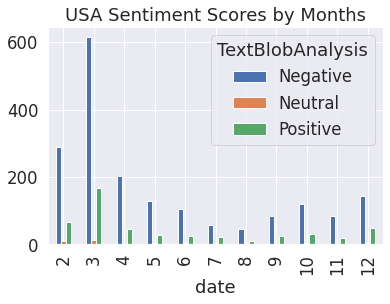

In [108]:

usa['date'] = pd.to_datetime(usa['Date'])
usa['date'] = usa['date'].dt.month


grouped = usa.groupby(by='date')['TextBlobAnalysis'].value_counts()


usasent= unstacked.plot.bar()
usasent.set_title("USA Sentiment Scores by Months")

### India Sentiments

<ipython-input-109-e1e56f1c25a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['date'] = pd.to_datetime(india['Date'])
<ipython-input-109-e1e56f1c25a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['date'] = india['date'].dt.month


Text(0.5, 1.0, 'India Sentiment Scores by Months')

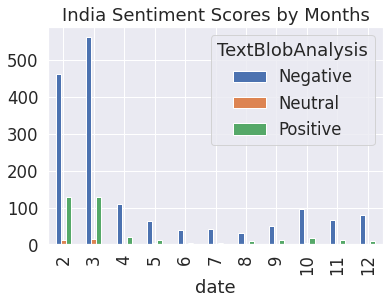

In [109]:
india['date'] = pd.to_datetime(india['Date'])
india['date'] = india['date'].dt.month


grouped = india.groupby(by='date')['TextBlobAnalysis'].value_counts()

unstacked = grouped.unstack(level=1)
indiasent = unstacked.plot.bar()
indiasent.set_title("India Sentiment Scores by Months")

### Russia Sentiments

<ipython-input-111-6799f6a99b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia['date'] = pd.to_datetime(russia['Date'])
<ipython-input-111-6799f6a99b2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia['date'] = russia['date'].dt.month


Text(0.5, 1.0, 'Russia Sentiment Scores by Months')

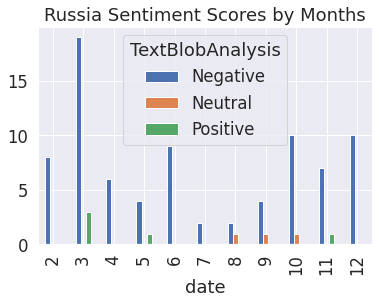

In [111]:
russia['date'] = pd.to_datetime(russia['Date'])
russia['date'] = russia['date'].dt.month


grouped = russia.groupby(by='date')['TextBlobAnalysis'].value_counts()

unstacked = grouped.unstack(level=1)
russiasent= unstacked.plot.bar()
russiasent.set_title("Russia Sentiment Scores by Months")

### Ukraine Sentiments

<ipython-input-112-53f4547c9c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine['date'] = pd.to_datetime(ukraine['Date'])
<ipython-input-112-53f4547c9c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine['date'] = ukraine['date'].dt.month


Text(0.5, 1.0, 'Ukraine Sentiment Scores by Months')

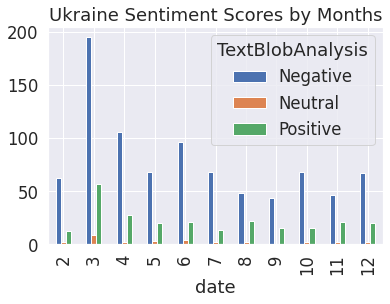

In [112]:
ukraine['date'] = pd.to_datetime(ukraine['Date'])
ukraine['date'] = ukraine['date'].dt.month


grouped = ukraine.groupby(by='date')['TextBlobAnalysis'].value_counts()

unstacked = grouped.unstack(level=1)
ukrainesent= unstacked.plot.bar()
ukrainesent.set_title("Ukraine Sentiment Scores by Months")

### UK Sentiments

<ipython-input-113-e18864d0c95d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  united_kingdom['date'] = pd.to_datetime(united_kingdom['Date'])
<ipython-input-113-e18864d0c95d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  united_kingdom['date'] = united_kingdom['date'].dt.month


Text(0.5, 1.0, 'UK Sentiment Scores by Months')

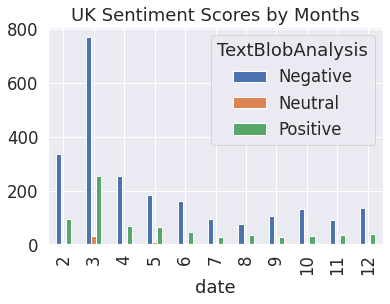

In [113]:
united_kingdom['date'] = pd.to_datetime(united_kingdom['Date'])
united_kingdom['date'] = united_kingdom['date'].dt.month


grouped = united_kingdom.groupby(by='date')['TextBlobAnalysis'].value_counts()

unstacked = grouped.unstack(level=1)
uksent= unstacked.plot.bar()
uksent.set_title("UK Sentiment Scores by Months")